In [38]:
import os
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import json
import csv
import pandas as pd
import seaborn as sns

# from lexical_change1 import get_time_series

In [39]:
ROOT = '/mnt/data0/lucy/manosphere/'
WORDS = ROOT + 'data/ann_sig_entities.csv'

In [40]:
words = pd.read_csv(WORDS)

In [41]:
words

,ngram,entity,related_entity,labels,det / poss,total_count,tagged_count,ratio,keep,reason
0,unigram,women,woman,"{""nom_per"": 4732827, ""prop_per"": 2689}","{"""": 4245758, ""all"": 103083, ""the"": 138958, ""a...",6605369,4735516.0,0.716919,Y,NaN
1,unigram,men,man,"{""nom_per"": 2997843, ""prop_per"": 5541}","{"""": 2727020, ""these"": 27717, ""the"": 90381, ""t...",4997436,3003384.0,0.600985,Y,NaN
2,unigram,people,person,"{""nom_per"": 2366727, ""prop_per"": 1109}","{""all"": 15223, """": 2009987, ""some"": 153769, ""t...",4650905,2367836.0,0.509113,Y,NaN
3,unigram,girl,girls,"{""nom_per"": 1434612, ""prop_per"": 3288}","{""a"": 626773, ""the"": 295847, """": 78635, ""this""...",2672802,1437900.0,0.537975,Y,NaN
4,unigram,man,men,"{""nom_per"": 1249340, ""prop_per"": 2377}","{""the"": 152902, ""a"": 589129, ""each"": 2686, ""ev...",2448682,1251717.0,0.511180,Y,NaN
...,...,...,...,...,...,...,...,...,...,...
9097,glossary,observed,NaN,NaN,NaN,18968,NaN,0.002109,N,NaN
9098,glossary,tools,NaN,NaN,NaN,41704,NaN,0.001391,N,NaN
9099,glossary,she,NaN,NaN,NaN,10856459,NaN,0.001328,Y,NaN
9100,glossary,jaw,NaN,NaN,NaN,49317,NaN,0.001196,N,NaN


In [42]:

# a few from top 50 
words = ['women', 'men', 'guys', 'girls', 'mgtow', 'incel', 
            'feminists', 'chad', 'bitch', 'females', 'males', 'chicks',
            'police', 'dad', 'victim', 'friend', 'everyone', 'community']

# words I'm curious about
words = ['mras', 'orbiter', 'simps', 'tyrone', 'slayer', 'stacies',
             'manginas', 'trannies', 'soyboy', 'becky', 'moids', 'amogs',
             'radfems', 'wahmen', 'vikings', 'sloots', 'omegas']


# plot word_manosphere_unnormalized
# plot word_control_unnormalized
# plot word_manosphere_normalized
# plot word_control_normalized



women = [873, 1649, 2015, 2348, 2304, 2289, 2133, 2122, 2864, 2647, 2371, 1702, 1631, 1931, 1534, 1834, 1974, 1616, 1460, 1775, 3034, 3376, 3071, 3162, 3330, 3529, 2880, 2939, 2996, 3117, 3194, 3303, 3840, 3515, 3630, 3914, 4485, 4929, 4447, 3551, 3273, 3479, 4188, 4786, 6090, 5770, 5248, 5527, 5750, 5886, 6266, 6129, 6515, 6895, 7746, 8845, 9886, 10607, 11187, 12635, 13226, 14516, 12488, 14883, 13882, 15246, 15825, 18941, 17843, 18181, 19903, 16221, 20068, 24141, 23547, 25393, 25204, 26846, 24529, 28923, 32141, 29722, 36651, 32120, 37755, 39229, 36780, 40807, 39289, 41661, 42455, 46530, 41188, 37041, 41547, 41883, 45196, 50162, 43460, 48051, 47896, 54549, 62524, 63175, 59898, 58561, 60947, 55784, 59563, 64004, 57504, 64687, 65441, 65774, 62926, 55836, 61894, 53162, 56099, 53959, 56674, 56974, 54820, 56550, 59973, 58049, 54557, 57573, 63463, 69818, 71437, 68139, 75468, 78096, 66856, 75018, 68272, 81542, 74867, 79313, 80343, 77233, 92073, 84771, 89118, 104525, 92024, 104261, 108789, 131644, 128026, 121932, 111476, 98563, 91152, 91634, 95999, 99270, 84796, 92358, 90427, 94097, 76710, 72840, 69009, 60959, 68796, 65870]
women_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']


men = [153, 414, 491, 486, 568, 589, 703, 600, 765, 666, 687, 497, 476, 527, 393, 484, 530, 667, 623, 577, 805, 757, 848, 875, 1029, 825, 707, 714, 786, 742, 930, 1289, 1317, 1299, 1386, 1290, 1690, 1786, 2010, 1272, 1289, 1187, 1788, 1861, 2980, 3045, 2459, 2529, 2695, 2702, 3440, 3659, 3749, 3053, 4171, 4644, 6559, 6580, 7126, 7970, 8101, 9371, 8049, 9369, 8870, 9627, 10712, 12399, 11182, 12928, 15242, 10530, 13375, 15369, 16549, 18663, 17142, 19950, 17060, 20199, 25059, 21584, 25687, 25002, 31388, 29645, 30351, 33306, 33377, 31616, 33204, 34398, 30448, 28751, 30270, 31362, 33450, 34121, 29420, 34290, 33438, 42211, 47127, 40492, 39650, 38150, 39638, 35839, 39490, 43402, 38688, 43915, 41195, 43246, 41204, 38026, 41744, 35294, 38859, 37881, 36563, 38249, 36080, 37193, 39113, 38113, 34629, 36588, 41140, 42463, 46185, 43727, 47216, 49223, 43874, 49202, 46469, 56466, 49875, 53682, 52550, 52655, 62172, 58901, 58531, 66874, 60088, 66969, 68637, 82805, 82784, 78187, 74398, 66652, 61484, 65497, 65022, 75636, 59549, 65882, 589025, 67843, 55989, 51577, 52638, 43192, 53581, 53002]
men_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', 
              '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', 
              '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', 
              '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', 
              '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', 
              '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', 
              '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', 
              '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', 
              '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', 
              '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', 
              '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', 
              '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', 
              '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', 
              '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', 
              '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', 
              '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', 
              '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', 
              '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', 
              '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', 
              '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', 
              '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', 
              '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']


guys = [1, 1392, 2356, 2663, 3057, 3456, 3383, 2931, 3050, 3798, 4022, 3352, 2633, 2266, 2695, 
        2411, 2693, 2464, 2332, 2529, 2510, 4042, 4789, 4730, 4490, 4580, 5162, 4400, 4529, 4087, 
        4392, 4278, 4246, 4648, 4740, 4589, 5493, 5607, 5657, 4322, 4164, 4000, 4265, 4271, 5128, 
        4978, 4495, 4696, 4630, 4705, 5190, 4948, 5187, 4772, 5138, 5641, 5668, 5477, 4883, 5519, 
        5937, 6075, 7489, 6290, 7454, 7106, 7838, 7564, 8519, 9208, 8679, 8834, 8821, 9198, 10801, 
        10191, 10142, 10321, 10093, 10131, 11625, 10690, 10387, 11189, 10398, 10371, 11708, 10195, 
        11409, 10998, 11574, 11208, 12259, 11246, 10700, 11826, 11478, 12205, 13311, 12116, 12717, 
        13138, 13807, 17258, 19031, 18495, 17289, 18592, 18238, 18247, 19521, 17443, 17555, 19617, 
        19667, 17783, 14690, 15914, 13993, 15683, 15111, 15243, 14665, 13648, 13612, 14429, 15069, 
        14275, 15257, 16166, 18073, 18502, 17740, 19878, 19758, 17758, 19304, 17366, 20021, 19213, 
        19560, 20355, 19133, 21837, 20303, 23097, 26636, 24438, 26316, 28576, 33534, 32203, 31768, 
        30022, 26178, 23279, 22419, 22937, 23873, 21218, 22535, 21286, 21543, 17781, 15380, 15617, 
        13650, 15609, 14486] 

guys_months = ['2005-11', '2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', 
               '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', 
               '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', 
               '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', 
               '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', 
               '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', 
               '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', 
               '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', 
               '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', 
               '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', 
               '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', 
               '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', 
               '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', 
               '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', 
               '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', 
               '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', 
               '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', 
               '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', 
               '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', 
               '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', 
               '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

girls = [1518, 2550, 3018, 3371, 3671, 3364, 3441, 3465, 4253, 4308, 3807, 2980, 2423, 3212, 3163, 3159, 2816, 2977, 3162, 3154, 4819, 6179, 5724, 5444, 4910, 6388, 5481, 5400, 5092, 5223, 5078, 5581, 6011, 6213, 6391, 6889, 7496, 7672, 5972, 5441, 5279, 5717, 5668, 6521, 6613, 6642, 6616, 7212, 6883, 7382, 6731, 7435, 7343, 7956, 7949, 7782, 7736, 7509, 8764, 8758, 9402, 11386, 9441, 10855, 10681, 12221, 12279, 13014, 14221, 13403, 13612, 13678, 14145, 17390, 16224, 16293, 15896, 15390, 15140, 18046, 16721, 17228, 17346, 16095, 15082, 17679, 15669, 16530, 16417, 17603, 16414, 17648, 16848, 15984, 16843, 16864, 16824, 18357, 16837, 17423, 17986, 18584, 22836, 25574, 24622, 23384, 24090, 24049, 22670, 23541, 22916, 22315, 23977, 23558, 20941, 18772, 19286, 17794, 19050, 18406, 18317, 17741, 16057, 15759, 16866, 17117, 16876, 17226, 18495, 20196, 20467, 19394, 21318, 21005, 19970, 21637, 20786, 23031, 20798, 21056, 21676, 20391, 23107, 21505, 23848, 28079, 25840, 26730, 28336, 34167, 30749, 31359, 30137, 27844, 26135, 24379, 24514, 24839, 22774, 23927, 22589, 22100, 19165, 16581, 17079, 15067, 16787, 15252] 
girls_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']




mgtow = [1, 1, 2, 2, 1, 0, 0, 0, 2, 3, 1, 3, 0, 0, 0, 2, 2, 3, 5, 2, 0, 1, 2, 6, 6, 0, 0, 1, 3, 9, 
         9, 5, 8, 9, 11, 18, 13, 13, 43, 32, 16, 65, 36, 38, 29, 52, 56, 49, 46, 74, 82, 329, 227, 
         159, 283, 151, 122, 249, 237, 220, 265, 290, 447, 487, 443, 342, 627, 492, 688, 581, 884, 
         972, 608, 544, 803, 1056, 1009, 1120, 1607, 1588, 2032, 3982, 3257, 3517, 3970, 5091, 4651, 
         3859, 4717, 4309, 3386, 3542, 4418, 4998, 3548, 4918, 4764, 4604, 4782, 5507, 8125, 9219, 
         10184, 8086, 9495, 9416, 9233, 9897, 10908, 12188, 12037, 14777, 13049, 13344, 14633, 
         16768, 12595, 12203, 12097, 11601, 11450, 13262, 14247, 13175, 12672, 11497, 10990, 
         11225, 10565, 12061, 9835, 10064, 8884, 9165, 8068, 8586, 8327, 6274, 6822, 5753]
mgtow_months = ['2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']


incel = [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 2, 0, 
         0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 11, 0, 4, 0, 4, 2, 5, 2, 2, 11, 25, 11, 
         27, 26, 47, 23, 15, 15, 19, 22, 181, 6, 43, 14, 38, 65, 52, 52, 65, 211, 1528, 1846, 
         1769, 3354, 1414, 1351, 1265, 1651, 1629, 1075, 1795, 1547, 1290, 84, 268, 480, 627, 
         632, 689, 594, 518, 434, 544, 648, 587, 1546, 2230, 3441, 3124, 3617, 5073, 4201, 3321, 
         3644, 4104, 4860, 4203, 3667, 5900, 5756, 7808, 9449, 12532, 17873, 16770, 14953, 17709, 
         23290, 21261, 19218, 18404, 16276, 13839, 13757, 13640, 13234, 10955, 12252, 11672, 10819, 
         7324, 4497, 4183, 3179, 3543, 2820]

incel_months = ['2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
                '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', 
                '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', 
                '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', 
                '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', 
                '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', 
                '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', 
                '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', 
                '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', 
                '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', 
                '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', 
                '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', 
                '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', 
                '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', 
                '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', 
                '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', 
                '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', 
                '2019-09', '2019-10', '2019-11']


feminists = [2, 3, 2, 1, 2, 1, 2, 2, 2, 1, 3, 4, 3, 0, 0, 0, 0, 0, 0, 1, 2, 6, 11, 3, 12, 12, 9, 6, 3, 11, 15, 70, 33, 41, 54, 17, 123, 91, 155, 96, 105, 59, 138, 145, 316, 433, 281, 265, 361, 222, 355, 454, 465, 325, 566, 531, 875, 771, 1067, 1035, 1359, 1271, 914, 1258, 1505, 1528, 1753, 2142, 1799, 2615, 2112, 1702, 2603, 2718, 2428, 3650, 2960, 3452, 2621, 3283, 4864, 3935, 4416, 4368, 7494, 6671, 6798, 7385, 8626, 6112, 7570, 6596, 6798, 5678, 5990, 6139, 6825, 5745, 4905, 6198, 5526, 8325, 8741, 6615, 5727, 6189, 6002, 6077, 5998, 5671, 5722, 6512, 5303, 5721, 5598, 5066, 5755, 4732, 5332, 5508, 4847, 5342, 5073, 4027, 4348, 3910, 3704, 3498, 3773, 3798, 4048, 3861, 4147, 5056, 3919, 5360, 4757, 6763, 5442, 4695, 4185, 4780, 5361, 5647, 6023, 6328, 4430, 5711, 4591, 6047, 6057, 5661, 5686, 5021, 4933, 4884, 5249, 5768, 4507, 4516, 528872, 5194, 4690, 4848, 4846, 3575, 3561, 3466] 
feminists_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

chad = [2, 0, 1, 0, 1, 3, 1, 0, 1, 2, 6, 0, 2, 10, 0, 0, 0, 1, 2, 1, 0, 4, 3, 15, 5, 4, 1, 4, 0, 0, 1, 2, 2, 0, 0, 0, 4, 5, 2, 4, 3, 3, 0, 3, 1, 0, 0, 4, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 3, 3, 1, 2, 2, 6, 16, 30, 17, 10, 4, 7, 12, 13, 11, 25, 30, 24, 9, 12, 30, 11, 31, 5, 13, 10, 35, 10, 7, 13, 6, 27, 40, 11, 9, 6, 9, 8, 9, 20, 8, 5, 9, 27, 56, 80, 69, 105, 279, 265, 402, 677, 663, 760, 1533, 1662, 1498, 1060, 2036, 1496, 1679, 1349, 1483, 1543, 1356, 1314, 1409, 1752, 1868, 1815, 2405, 3514, 3101, 4164, 5118, 5380, 5307, 6314, 6041, 7188, 7180, 7183, 10168, 9899, 12464, 10482, 14004, 17405, 16227, 16828, 18451, 21981, 21654, 20981, 20730, 19055, 15490, 13271, 14879, 14339, 13067, 14568, 13040, 13867, 8106, 3842, 3797, 2562, 2677, 2620]
chad_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']


bitch = [45, 200, 201, 204, 257, 285, 244, 270, 323, 266, 234, 230, 170, 197, 162, 226, 150, 181, 173, 212, 308, 376, 383, 326, 316, 414, 317, 369, 288, 382, 300, 326, 351, 341, 412, 408, 490, 441, 425, 283, 333, 284, 281, 361, 357, 438, 408, 342, 393, 446, 458, 492, 455, 466, 477, 435, 566, 589, 606, 673, 647, 833, 727, 835, 691, 809, 1701, 883, 1108, 936, 941, 1013, 1121, 1143, 1191, 1033, 1204, 1134, 1128, 1231, 1164, 1185, 1524, 1300, 1161, 1426, 1177, 1621, 1368, 1505, 1615, 1641, 1355, 1408, 1673, 1779, 1857, 2176, 2298, 2210, 2450, 2151, 2755, 3186, 3383, 3219, 3335, 3957, 3353, 3582, 3489, 3435, 3648, 3910, 3664, 3558, 3518, 3176, 3549, 3132, 3079, 3323, 3115, 3040, 3041, 3126, 3236, 3253, 3639, 4060, 4211, 3777, 4228, 4232, 3874, 4291, 4181, 4708, 4678, 5071, 4966, 5056, 6025, 5312, 5407, 5903, 5992, 6566, 7000, 7741, 7875, 7506, 7394, 6581, 5649, 5047, 5696, 5545, 5408, 5608, 5164, 5491, 4223, 3749, 3320, 3353, 3654, 3282] 
bitch_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']


females = [16, 39, 46, 65, 57, 103, 59, 81, 76, 101, 74, 37, 55, 44, 52, 40, 39, 80, 64, 92, 84, 122, 140, 172, 214, 196, 152, 139, 129, 121, 133, 140, 127, 125, 110, 118, 149, 161, 161, 84, 109, 143, 136, 156, 189, 179, 146, 189, 151, 172, 164, 176, 175, 190, 155, 251, 324, 331, 307, 254, 334, 460, 348, 369, 370, 388, 464, 476, 508, 590, 578, 474, 614, 815, 725, 625, 659, 883, 813, 838, 866, 864, 1108, 986, 1208, 1302, 996, 1217, 1153, 1232, 1021, 1192, 924, 936, 1303, 1006, 1108, 1390, 1196, 1329, 1357, 1439, 1942, 2269, 1769, 1746, 1877, 1663, 1881, 2313, 2084, 1917, 2272, 2330, 2239, 1735, 1693, 1742, 1629, 1649, 1719, 1755, 1801, 1695, 1704, 1818, 1692, 1736, 1985, 2247, 2815, 3041, 3456, 3508, 2831, 3347, 3767, 4313, 3865, 4175, 5408, 4823, 5735, 5145, 5629, 6683, 6179, 5662, 6048, 7463, 7073, 5906, 5610, 4715, 4101, 4408, 4963, 4877, 3828, 4977, 4577, 4243, 2955, 2404, 2428, 1939, 1917, 1788] 
females_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']


males = [28, 28, 43, 53, 50, 69, 40, 103, 55, 76, 49, 44, 36, 35, 24, 38, 46, 45, 34, 73, 91, 90, 80, 74, 82, 86, 49, 67, 55, 57, 88, 103, 101, 81, 73, 93, 114, 153, 124, 90, 75, 143, 102, 151, 171, 164, 117, 182, 169, 211, 166, 237, 179, 200, 198, 278, 385, 339, 353, 365, 359, 605, 442, 384, 399, 509, 481, 619, 540, 601, 660, 587, 736, 849, 777, 767, 733, 1017, 873, 1029, 1155, 1024, 1293, 1209, 1569, 1519, 1331, 1474, 1546, 1333, 1390, 1738, 1311, 1230, 1704, 1440, 1512, 1665, 1514, 1776, 1744, 2053, 2564, 2565, 2426, 2113, 2320, 2035, 2133, 2348, 2253, 2288, 2427, 2911, 2414, 1850, 1892, 1738, 1925, 1780, 1764, 1864, 2001, 1730, 1988, 1942, 1817, 1844, 2014, 2327, 2338, 2686, 2734, 2678, 2152, 2173, 2506, 2752, 2687, 2834, 3032, 2688, 2979, 3357, 3227, 4125, 3826, 3810, 4092, 5384, 4970, 4428, 4310, 4156, 3489, 3566, 3444, 4104, 3108, 3906, 3587, 3322, 2416, 1782, 2111, 1674, 1918, 1831] 
males_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']


chicks = [208, 536, 534, 526, 456, 536, 371, 430, 653, 533, 508, 334, 273, 358, 390, 387, 315, 328, 290, 437, 431, 532, 593, 491, 467, 528, 449, 481, 473, 572, 402, 439, 474, 423, 576, 455, 587, 544, 442, 447, 451, 439, 346, 452, 482, 508, 452, 501, 461, 528, 516, 548, 561, 613, 641, 602, 512, 522, 568, 558, 711, 939, 703, 789, 752, 998, 950, 1065, 1250, 1074, 1258, 1226, 1242, 1322, 1313, 1452, 1242, 1090, 1208, 1423, 1234, 1210, 1378, 1251, 1199, 1509, 1300, 1334, 1167, 1277, 1384, 1404, 1134, 1226, 1319, 1327, 1682, 1682, 1428, 1559, 1573, 1441, 1990, 2117, 2252, 2082, 2302, 2110, 2148, 1968, 1811, 1926, 2044, 2045, 2007, 1537, 1680, 1517, 1806, 1563, 1674, 1635, 1383, 1466, 1712, 1685, 1669, 1804, 1975, 2049, 2193, 1985, 2132, 2120, 1959, 2102, 1801, 2019, 1975, 2076, 2090, 2061, 2337, 2094, 2105, 2501, 2133, 2173, 2256, 2724, 2406, 2621, 2789, 2191, 2009, 1939, 1879, 1874, 2028, 1938, 1695, 1773, 1600, 1266, 1190, 1097, 1183, 1160] 
chicks_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

police = [6, 36, 15, 12, 27, 38, 26, 22, 21, 31, 19, 23, 8, 7, 14, 21, 13, 19, 13, 14, 20, 27, 32, 30, 23, 41, 30, 37, 29, 19, 47, 45, 54, 24, 36, 76, 62, 54, 64, 41, 67, 34, 66, 122, 137, 148, 100, 92, 146, 109, 106, 141, 121, 133, 187, 276, 224, 399, 237, 370, 416, 425, 419, 390, 612, 425, 528, 444, 664, 600, 636, 476, 526, 683, 675, 929, 1072, 790, 826, 997, 1126, 1026, 1390, 1437, 1411, 1642, 1130, 1539, 1689, 1167, 1395, 1977, 1469, 1383, 1439, 1454, 1938, 1564, 1719, 1588, 1291, 1823, 2003, 2234, 2789, 2395, 2044, 1963, 2670, 2284, 2039, 1972, 2312, 2644, 2275, 1953, 1973, 1746, 1907, 2285, 2095, 2680, 2380, 2004, 2043, 1737, 2083, 3472, 2360, 2201, 2364, 1782, 1915, 1789, 2070, 2242, 2591, 1959, 2132, 2435, 1998, 2117, 2702, 2214, 3472, 2698, 2519, 2663, 2737, 2999, 3029, 2670, 2443, 2861, 2581, 2510, 2131, 2605, 2109, 2316, 2103, 2426, 1922, 1747, 1411, 1517, 1366, 1243] 
police_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']


dad = [10, 44, 59, 92, 93, 71, 60, 48, 140, 106, 88, 54, 69, 54, 48, 64, 46, 55, 85, 94, 131, 115, 106, 73, 112, 127, 97, 116, 105, 98, 107, 92, 133, 111, 138, 138, 161, 122, 145, 85, 84, 92, 121, 213, 129, 196, 130, 139, 203, 142, 172, 209, 158, 173, 322, 284, 281, 326, 284, 315, 354, 343, 309, 324, 317, 416, 475, 416, 483, 468, 504, 621, 577, 582, 658, 671, 696, 759, 855, 779, 762, 869, 831, 801, 1055, 962, 838, 848, 785, 1095, 1209, 1009, 1023, 948, 849, 1030, 1196, 1059, 982, 1189, 1470, 1445, 1862, 1637, 1840, 1546, 1471, 1456, 1733, 1779, 1813, 1811, 2013, 2763, 2175, 1956, 2129, 1631, 1659, 1736, 1642, 1850, 1782, 1631, 1790, 1737, 1831, 1760, 1883, 1901, 1916, 1754, 2078, 2191, 1963, 2227, 2189, 2545, 2597, 2343, 2480, 2687, 2421, 2365, 2467, 3191, 2820, 3245, 3143, 3890, 4114, 3811, 3512, 3344, 2981, 3045, 3523, 3239, 2973, 3322, 3177, 3157, 2967, 2320, 2240, 2002, 2002, 2165] 
dad_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

victim = [4, 15, 7, 9, 15, 10, 14, 9, 22, 17, 10, 6, 6, 15, 6, 12, 16, 12, 13, 13, 20, 22, 14, 20, 28, 20, 23, 45, 73, 18, 51, 73, 82, 43, 51, 49, 47, 59, 61, 58, 67, 61, 77, 88, 122, 135, 143, 99, 136, 119, 156, 149, 144, 173, 172, 242, 215, 243, 226, 353, 426, 416, 453, 449, 436, 591, 757, 566, 734, 728, 1088, 544, 594, 903, 849, 686, 1205, 1128, 835, 1262, 1422, 1578, 1670, 1538, 2027, 2113, 1742, 2596, 1979, 1676, 1689, 1768, 1905, 1701, 1719, 1624, 1850, 1774, 1536, 2210, 1843, 2214, 2456, 2106, 2099, 2242, 2229, 1803, 2196, 1848, 1848, 2358, 1943, 2081, 1972, 2068, 1941, 1826, 1621, 1726, 1744, 2004, 2119, 1727, 1773, 1536, 2294, 1519, 1800, 1692, 1801, 1603, 1899, 2029, 1769, 1811, 1732, 2214, 1994, 2059, 1812, 1678, 2511, 2186, 2540, 2373, 2133, 2441, 2370, 2724, 2686, 2368, 2542, 2422, 2447, 1692, 2085, 2296, 1833, 2129, 2019, 2061, 1635, 1646, 1368, 1361, 1402, 1353] 
victim_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']


friend = [714, 1243, 1431, 1620, 1651, 1789, 1678, 1920, 2054, 2220, 1697, 1485, 1385, 1603, 1502, 1573, 1456, 1479, 1508, 1605, 2374, 3217, 3134, 2706, 2578, 3175, 2869, 2990, 2595, 2557, 2592, 2681, 2775, 2614, 2794, 3411, 3794, 3655, 2902, 2806, 2669, 2934, 2595, 2984, 2888, 2966, 2919, 3146, 2991, 3331, 3033, 3226, 2783, 3178, 3423, 3306, 3337, 3127, 3587, 3866, 3797, 4860, 4041, 5028, 4508, 5117, 4765, 5128, 6252, 6071, 6112, 5668, 6025, 7342, 6284, 6402, 6625, 6267, 6249, 6994, 6502, 6667, 6588, 6276, 6226, 6697, 5936, 6381, 6348, 6354, 6243, 6603, 6268, 5664, 6072, 6183, 5905, 6581, 6271, 6635, 6535, 6753, 6987, 7943, 7568, 7239, 7714, 7577, 7308, 7821, 6965, 7332, 7716, 7655, 7009, 7147, 6973, 6365, 6565, 6531, 6969, 6296, 5952, 5970, 5928, 6376, 6255, 6357, 6879, 6978, 7370, 6831, 8307, 8557, 7597, 8107, 7798, 8177, 7909, 8296, 8787, 8106, 9256, 8541, 9749, 10897, 10280, 9899, 10281, 11826, 11358, 11043, 10420, 9510, 9052, 9626, 9411, 9886, 9231, 8894, 8586, 8849, 7711, 7321, 6988, 6286, 7048, 6862] 
friend_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

everyone = [309, 657, 730, 863, 937, 1000, 777, 812, 908, 1048, 818, 677, 561, 713, 617, 642, 608, 574, 551, 663, 1064, 1342, 1168, 1091, 1154, 1488, 1113, 1185, 1061, 1024, 1019, 1032, 1223, 1080, 1035, 1257, 1479, 1440, 1199, 987, 1048, 1080, 1079, 1214, 1270, 1217, 1211, 1187, 1184, 1246, 1293, 1373, 1280, 1231, 1371, 1499, 1676, 1465, 1743, 1844, 2089, 2463, 2108, 2472, 2208, 2638, 2478, 2788, 2929, 3285, 3401, 2999, 3397, 4071, 3760, 3872, 3886, 4071, 4070, 4819, 4756, 4557, 5191, 4621, 4906, 5198, 4687, 5197, 5156, 5177, 5110, 5547, 5084, 4676, 5047, 5292, 5628, 5868, 5271, 5835, 6122, 6969, 7572, 7535, 7385, 7054, 7592, 7067, 7267, 7692, 7230, 7757, 7982, 8396, 7876, 6972, 7060, 6636, 7296, 6659, 6740, 6918, 6672, 6660, 6850, 6698, 6661, 7015, 7420, 8137, 8385, 8365, 9808, 9435, 8193, 8830, 8416, 8940, 8963, 8482, 9847, 9124, 10671, 10593, 11666, 12884, 12249, 13087, 14069, 16790, 15693, 14648, 14214, 13405, 12003, 11564, 11754, 12731, 11001, 11931, 11022, 11495, 9216, 8059, 7794, 7019, 7634, 7290] 
everyone_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

community = [234, 431, 444, 517, 748, 751, 461, 551, 682, 764, 619, 462, 394, 422, 368, 326, 431, 297, 422, 389, 540, 589, 517, 475, 525, 576, 458, 579, 556, 480, 459, 520, 509, 509, 435, 659, 642, 591, 481, 416, 427, 456, 535, 530, 530, 504, 563, 642, 561, 545, 548, 620, 564, 510, 582, 522, 573, 571, 582, 675, 772, 877, 736, 869, 866, 923, 982, 1056, 1041, 1159, 1202, 939, 1268, 1400, 1109, 1381, 1255, 1136, 1209, 1337, 1612, 1442, 1673, 1332, 1567, 1554, 1435, 1655, 1507, 1603, 1679, 1603, 1672, 1425, 1386, 1302, 1582, 1654, 1535, 1606, 1622, 2018, 1868, 1992, 1854, 1781, 1863, 1867, 1770, 1928, 1676, 1930, 1807, 2119, 2090, 1845, 1871, 1494, 1724, 1629, 1582, 1824, 1614, 1583, 2000, 1680, 1619, 1848, 1672, 1752, 1778, 1783, 2002, 2014, 1836, 2004, 1971, 2300, 2096, 1983, 2218, 1895, 2166, 2763, 2807, 2842, 2748, 2989, 3567, 4256, 4161, 3549, 3518, 3395, 2897, 2913, 3025, 3267, 2758, 2977, 2847, 3005, 2462, 1992, 1981, 1554, 1754, 1601] 
community_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']



# save to file: matplotlib.pyplot.savefig()






In [43]:


mras = [1, 0, 0, 1, 3, 1, 4, 1, 12, 8, 6, 2, 5, 11, 11, 35, 40, 30, 36, 65, 19, 102, 63, 64, 20, 35, 13, 80, 100, 120, 111, 97, 77, 94, 179, 217, 218, 323, 401, 330, 487, 426, 312, 524, 558, 480, 772, 464, 449, 508, 742, 1071, 748, 832, 634, 1246, 1110, 975, 1162, 1499, 1022, 1040, 959, 924, 886, 946, 1056, 1160, 819, 537, 982, 733, 1517, 1429, 915, 682, 643, 639, 484, 583, 576, 724, 896, 624, 814, 718, 551, 573, 552, 758, 695, 489, 538, 619, 537, 433, 413, 360, 448, 377, 350, 474, 337, 484, 550, 364, 406, 538, 725, 648, 464, 450, 488, 491, 592, 446, 499, 403, 406, 364, 470, 544, 409, 523, 442, 289, 415, 361, 425, 411, 319, 378, 399, 429, 527, 493, 305, 235, 320] 
mras_months = ['2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

orbiter = [1, 0, 1, 2, 2, 4, 0, 2, 3, 3, 2, 5, 2, 7, 8, 9, 13, 3, 3, 8, 46, 10, 13, 20, 12, 8, 17, 6, 19, 15, 13, 21, 12, 10, 21, 11, 14, 16, 12, 14, 4, 3, 17, 22, 18, 10, 19, 16, 34, 12, 28, 27, 14, 24, 14, 18, 22, 30, 25, 21, 22, 25, 19, 15, 28, 25, 22, 49, 18, 21, 31, 11, 32, 14, 25, 48, 32, 23, 29, 20, 19, 36, 32, 38, 28, 59, 36, 30, 43, 75, 76, 83, 97, 98, 137, 121, 111, 158, 223, 167, 245, 244, 186, 229, 270, 292, 366, 399, 379, 340, 354, 320, 367, 307, 284, 256, 321, 308, 378, 269, 312, 322, 229, 245, 269, 235, 366, 292, 234, 257, 306, 258, 331, 352, 385, 389, 414, 397, 473, 435, 501, 389, 473, 543, 498, 531, 611, 603, 589, 580, 657, 597, 644, 500, 518, 456, 458, 573, 489, 541, 406, 442, 363, 305, 326, 248, 265, 240] 
orbiter_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

simps = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 1, 4, 2, 3, 1, 4, 1, 0, 2, 5, 1, 0, 2, 2, 0, 3, 0, 6, 12, 8, 6, 9, 1, 10, 6, 4, 12, 21, 9, 9, 9, 11, 15, 15, 12, 16, 21, 18, 23, 34, 36, 44, 35, 74, 32, 37, 31, 28, 30, 36, 28, 38, 23, 32, 58, 58, 56, 70, 87, 83, 64, 46, 61, 74, 102, 125, 140, 290, 247, 312, 369, 312, 423, 457, 429, 476, 702, 768, 839, 893, 866, 1102, 1167, 1018, 906, 998, 1062, 1018, 875, 979, 1085, 1078, 934, 1121, 881, 760, 755, 662] 
simps_months = ['2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

tyrone = [1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 2, 1, 3, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 9, 0, 0, 3, 0, 0, 1, 1, 1, 2, 4, 3, 5, 1, 0, 0, 2, 3, 1, 2, 2, 1, 3, 3, 7, 6, 15, 10, 4, 10, 7, 7, 8, 33, 103, 22, 20, 14, 15, 56, 42, 20, 9, 10, 10, 21, 31, 22, 29, 18, 18, 23, 14, 9, 20, 54, 33, 27, 43, 55, 89, 62, 84, 99, 121, 216, 289, 309, 386, 658, 491, 510, 820, 926, 983, 998, 1624, 1508, 1702, 1766, 1593, 1010, 840, 1089, 1043, 1034, 915, 816, 852, 589, 329, 321, 251, 200, 329] 
tyrone_months = ['2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

slayer = [1, 2, 1, 2, 2, 4, 16, 36, 10, 3, 0, 3, 2, 1, 4, 0, 2, 0, 0, 5, 4, 1, 1, 1, 2, 3, 1, 0, 2, 1, 0, 2, 3, 4, 6, 2, 4, 1, 0, 1, 7, 9, 3, 3, 5, 7, 3, 6, 5, 1, 1, 3, 3, 2, 1, 2, 1, 4, 2, 1, 3, 1, 1, 4, 5, 0, 5, 4, 1, 8, 4, 7, 6, 4, 5, 6, 3, 8, 12, 4, 1, 11, 4, 8, 11, 2, 7, 19, 37, 33, 11, 13, 13, 15, 12, 10, 11, 17, 14, 16, 57, 854, 1059, 974, 803, 1017, 933, 886, 1419, 994, 752, 1251, 1083, 766, 22, 93, 235, 245, 257, 249, 150, 147, 56, 149, 120, 164, 171, 146, 90, 89, 193, 134, 97, 93, 86, 81, 113, 82, 121, 162, 212, 359, 325, 489, 704, 676, 486, 383, 462, 375, 414, 378, 380, 353, 306, 298, 346, 267, 275, 280, 253, 175, 62, 51, 55, 57, 32] 
slayer_months = ['2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

stacies = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 5, 1, 0, 2, 4, 1, 4, 12, 8, 16, 13, 17, 14, 16, 43, 33, 40, 69, 74, 130, 188, 232, 226, 238, 444, 413, 683, 868, 741, 626, 680, 917, 929, 792, 744, 802, 705, 588, 572, 649, 678, 734, 655, 582, 367, 203, 164, 90, 223, 161] 
stacies_months = ['2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

manginas = [1, 1, 0, 0, 4, 1, 0, 6, 0, 1, 1, 1, 10, 9, 5, 0, 5, 10, 124, 176, 13, 11, 16, 15, 20, 13, 23, 6, 8, 20, 28, 17, 15, 14, 38, 24, 23, 37, 23, 14, 24, 18, 23, 25, 43, 47, 50, 41, 35, 56, 62, 57, 58, 50, 66, 73, 99, 113, 89, 107, 72, 81, 38, 61, 71, 86, 82, 76, 125, 97, 113, 156, 176, 151, 220, 232, 214, 167, 250, 170, 169, 302, 262, 297, 239, 207, 264, 245, 202, 292, 327, 396, 340, 266, 258, 320, 239, 323, 299, 285, 343, 414, 299, 376, 349, 314, 362, 316, 206, 214, 228, 181, 149, 166, 148, 99, 103, 104, 90, 114, 94, 104, 80, 89, 74, 97, 75, 66, 81, 31] 
manginas_months = ['2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

trannies = [1, 0, 4, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 4, 4, 1, 2, 0, 0, 2, 5, 0, 3, 1, 1, 3, 2, 3, 9, 2, 3, 9, 19, 17, 5, 5, 18, 3, 4, 22, 5, 3, 4, 2, 18, 5, 5, 4, 19, 12, 24, 37, 13, 10, 4, 14, 16, 6, 15, 18, 27, 30, 24, 34, 20, 53, 78, 73, 79, 50, 44, 92, 160, 163, 66, 59, 34, 115, 56, 23, 50, 84, 80, 84, 53, 32, 57, 110, 99, 61, 44, 43, 63, 67, 54, 52, 56, 26, 61, 47, 66, 76, 98, 116, 101, 141, 120, 193, 335, 184, 200, 173, 243, 213, 309, 239, 266, 219, 227, 265, 369, 320, 498, 450, 504, 331, 90, 85, 47, 69, 46] 
trannies_months = ['2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

soyboy = [1, 7, 5, 13, 60, 93, 302, 217, 259, 358, 576, 608, 732, 541, 550, 546, 556, 421, 514, 366, 397, 333, 343, 238, 100, 87, 66, 77, 76] 
soyboy_months = ['2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

becky = [1, 0, 0, 0, 1, 2, 4, 4, 0, 4, 1, 1, 0, 3, 0, 0, 1, 0, 0, 4, 4, 1, 1, 0, 4, 5, 1, 1, 0, 1, 1, 0, 1, 4, 2, 3, 2, 2, 1, 1, 1, 4, 1, 2, 0, 1, 0, 1, 1, 12, 8, 1, 9, 2, 6, 7, 0, 4, 14, 0, 4, 3, 2, 2, 6, 3, 0, 11, 3, 3, 1, 2, 2, 5, 3, 5, 14, 3, 14, 1, 12, 6, 13, 5, 6, 27, 8, 6, 12, 26, 41, 2, 7, 9, 7, 1, 6, 10, 10, 31, 23, 3, 18, 45, 9, 24, 10, 5, 7, 7, 9, 10, 8, 4, 16, 11, 35, 7, 26, 18, 11, 10, 13, 27, 13, 21, 31, 16, 17, 20, 13, 16, 27, 17, 74, 19, 39, 24, 27, 37, 54, 193, 50, 72, 73, 131, 153, 133, 248, 274, 219, 321, 315, 272, 233, 368, 385, 380, 501, 540, 560, 282, 160, 167, 114, 239, 248] 
becky_months = ['2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

moids = [1, 0, 3, 5, 15, 19, 22, 81, 293, 279, 172, 245, 556, 400, 407, 462, 553, 371, 348, 386, 427, 302, 196, 167, 645, 588] 
moids_months = ['2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

amogs = [29, 50, 47, 65, 71, 65, 60, 59, 84, 109, 74, 44, 40, 53, 39, 41, 50, 30, 28, 46, 48, 70, 45, 48, 56, 47, 54, 39, 65, 58, 48, 60, 46, 47, 66, 43, 62, 70, 40, 38, 55, 45, 23, 38, 43, 30, 23, 25, 35, 38, 34, 36, 29, 24, 15, 21, 20, 36, 30, 42, 28, 44, 47, 23, 23, 48, 41, 37, 54, 46, 31, 15, 23, 38, 35, 24, 35, 22, 30, 38, 28, 41, 27, 28, 21, 23, 12, 58, 25, 12, 18, 11, 10, 21, 23, 10, 23, 4, 16, 15, 9, 14, 53, 38, 42, 42, 70, 61, 47, 46, 64, 40, 51, 53, 43, 9, 11, 13, 23, 16, 14, 18, 14, 11, 16, 9, 15, 15, 11, 4, 6, 4, 9, 9, 7, 9, 8, 4, 13, 12, 9, 9, 11, 10, 10, 14, 7, 14, 8, 8, 8, 4, 14, 6, 10, 7, 8, 7, 3, 6, 6, 8, 3, 3, 7, 4, 3, 3] 
amogs_months = ['2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

radfems = [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 8, 3, 3, 2, 5, 7, 24, 13, 70, 34, 11, 37, 27, 40, 35, 50, 79, 51, 112, 77, 116, 80, 135, 90, 154, 136, 96, 90, 97, 69, 69, 93, 116, 139, 82, 96, 74, 93, 161, 96, 64, 72, 60, 67, 38, 49, 83, 66, 35, 51, 72, 28, 35, 46, 53, 36, 36, 15, 27, 14, 19, 24, 12, 29, 20, 21, 21, 39, 38, 7, 8, 28, 16, 25, 23, 17, 12, 12, 20, 18, 21, 31, 18, 23, 24, 25, 27, 37, 52, 40, 48, 13, 24, 29, 9, 51, 34, 28, 28, 14, 40, 27, 39, 25] 
radfems_months = ['2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

wahmen = [1, 6, 4, 4, 2, 6, 26, 24, 20, 40, 88, 106, 364, 195, 142, 179, 163, 174, 197, 233, 268, 206, 286, 225, 111, 107, 93, 93, 119] 
wahmen_months = ['2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

vikings = [4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 3, 1, 3, 2, 0, 4, 1, 0, 1, 3, 2, 1, 2, 0, 4, 3, 11, 3, 4, 1, 1, 2, 5, 3, 4, 6, 9, 14, 12, 16, 14, 12, 10, 8, 15, 16, 12, 18, 24, 25, 10, 17, 22, 13, 20, 20, 32, 54, 43, 43, 35, 19, 50, 35, 33, 43, 14, 28, 57, 33, 26, 32, 20, 41, 26, 19, 29, 25, 50, 32, 48, 27, 15, 56, 17, 59, 31, 41, 147, 66, 35, 27, 33, 61, 27, 26, 62, 128, 43, 40, 83, 48, 49, 40, 51, 75, 58, 50, 64, 54, 40, 67, 38, 43, 20, 9, 12, 14, 12, 15] 
vikings_months = ['2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

sloots = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 3, 5, 3, 0, 3, 5, 1, 2, 2, 2, 2, 3, 13, 1, 12, 3, 3, 3, 8, 16, 9, 14, 18, 20, 39, 78, 54, 63, 32, 46, 40, 45, 77, 42, 56, 85, 82, 64, 37, 34, 38, 55, 61, 25, 39, 23, 19, 36, 54, 47, 44, 44, 36, 26, 34, 31, 41, 45, 37, 31, 38, 41, 40, 34, 70, 75, 57, 54, 58, 41, 29, 47, 100, 74, 68, 44, 34, 21, 24, 25, 18, 20, 27, 25, 23, 10, 9, 5, 19, 11, 14] 
sloots_months = ['2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']

omegas = [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 1, 0, 0, 1, 0, 0, 1, 1, 1, 3, 0, 0, 3, 0, 1, 7, 0, 1, 2, 0, 4, 5, 3, 0, 8, 2, 2, 3, 2, 2, 6, 6, 7, 1, 9, 5, 12, 7, 6, 11, 6, 40, 20, 30, 11, 4, 14, 18, 18, 33, 51, 47, 42, 58, 28, 41, 57, 32, 31, 43, 43, 44, 41, 32, 52, 44, 49, 30, 33, 51, 80, 32, 34, 43, 55, 81, 59, 33, 24, 31, 50, 63, 42, 46, 56, 26, 21, 64, 41, 24, 29, 34, 26, 16, 19, 29, 27, 25, 24, 35, 47, 66, 48, 49, 35, 30, 32, 22, 31, 21, 18, 28, 27, 23, 13, 10, 10, 6, 10, 3] 
omegas_months = ['2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11']




In [44]:
women_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in women_months]
men_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in men_months]
guys_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in guys_months]
girls_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in girls_months]
mgtow_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in mgtow_months]
incel_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in incel_months]
feminists_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in feminists_months]
chad_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in chad_months]
bitch_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in bitch_months]
females_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in females_months]
males_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in males_months]
chicks_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in chicks_months]
police_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in police_months]
dad_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in dad_months]
victim_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in victim_months]
friend_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in friend_months]
everyone_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in everyone_months]
community_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in community_months]


# women_manosphere = sns.lineplot(x = women_months, y = women)
# plt.title("women")
# plt.savefig('women_manosphere.png')

# men_manosphere = sns.lineplot(x = men_months, y = men)
# plt.title("men")
# plt.savefig('men_manosphere.png')

# guys_manosphere = sns.lineplot(x = guys_months, y = guys)
# plt.title("guys")
# plt.savefig('guys_manosphere.png')

# girls_manosphere = sns.lineplot(x = girls_months, y = girls)
# plt.title("girls")
# plt.savefig('girls_manosphere.png')

# mgtow_manosphere = sns.lineplot(x = mgtow_months, y = mgtow)
# plt.title("mgtow")
# plt.savefig('mgtow_manosphere.png')

# incel_manosphere = sns.lineplot(x = incel_months, y = incel)
# plt.title("incel")
# plt.savefig('incel_manosphere.png')

# feminists_manosphere = sns.lineplot(x = feminists_months, y = feminists)
# plt.title("feminists")
# plt.savefig('feminists_manosphere.png')

# chad_manosphere = sns.lineplot(x = chad_months, y = chad)
# plt.title("chad")
# plt.savefig('chad_manosphere.png')

# bitch_manosphere = sns.lineplot(x = bitch_months, y = bitch)
# plt.title("bitch")
# plt.savefig('bitch_manosphere.png')

# females_manosphere = sns.lineplot(x = females_months, y = females)
# plt.title("females")
# plt.savefig('females_manosphere.png')

# males_manosphere = sns.lineplot(x = males_months, y = males)
# plt.title("males")
# plt.savefig('males_manosphere.png')

# chicks_manosphere = sns.lineplot(x = chicks_months, y = chicks)
# plt.title("chicks")
# plt.savefig('chicks_manosphere.png')

# police_manosphere = sns.lineplot(x = police_months, y = police)
# plt.title("police")
# plt.savefig('police_manosphere.png')

# dad_manosphere = sns.lineplot(x = dad_months, y = dad)
# plt.title("dad")
# plt.savefig('dad_manosphere.png')

# victim_manosphere = sns.lineplot(x = victim_months, y = victim)
# plt.title("victim")
# plt.savefig('victim_manosphere.png')

# friend_manosphere = sns.lineplot(x = friend_months, y = friend)
# plt.title("friend")
# plt.savefig('friend_manosphere.png')

# everyone_manosphere = sns.lineplot(x = everyone_months, y = everyone)
# plt.title("everyone")
# plt.savefig('everyone_manosphere.png')

# community_manosphere = sns.lineplot(x = community_months, y = community)
# plt.title("community")
# plt.savefig('community_manosphere.png')


# # women_manosphere.savefig('women_manosphere.png')


# # plt.savefig('save_as_a_png.png')

# matplotlib.pyplot.savefig()


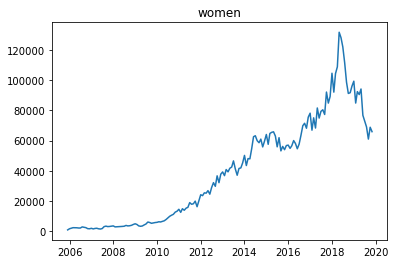

In [45]:
women_manosphere = sns.lineplot(x = women_months, y = women)
plt.title("women")
plt.savefig('women_manosphere.png')

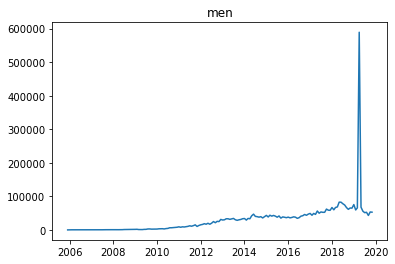

In [46]:
men_manosphere = sns.lineplot(x = men_months, y = men)
plt.title("men")
plt.savefig('men_manosphere.png')

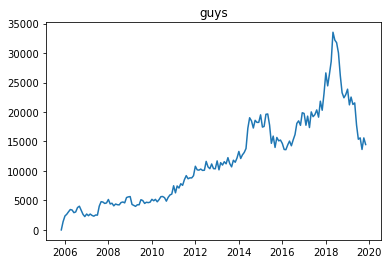

In [47]:
guys_manosphere = sns.lineplot(x = guys_months, y = guys)
plt.title("guys")
plt.savefig('guys_manosphere.png')

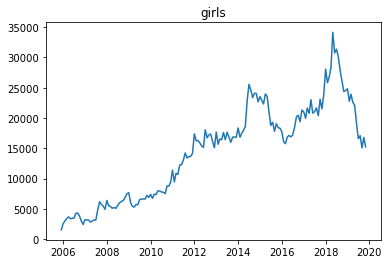

In [48]:
girls_manosphere = sns.lineplot(x = girls_months, y = girls)
plt.title("girls")
plt.savefig('girls_manosphere.png')

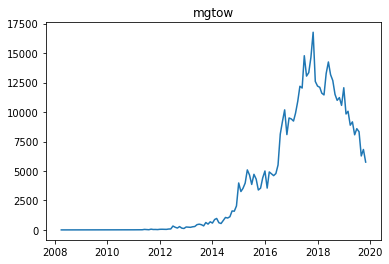

In [49]:
mgtow_manosphere = sns.lineplot(x = mgtow_months, y = mgtow)
plt.title("mgtow")
plt.savefig('mgtow_manosphere.png')

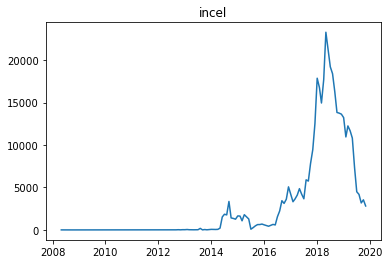

In [50]:
incel_manosphere = sns.lineplot(x = incel_months, y = incel)
plt.title("incel")
plt.savefig('incel_manosphere.png')

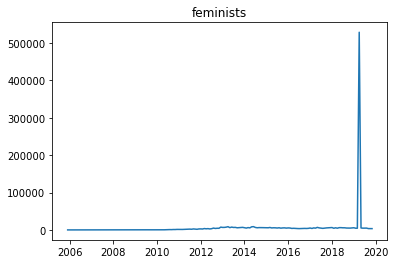

In [51]:
feminists_manosphere = sns.lineplot(x = feminists_months, y = feminists)
plt.title("feminists")
plt.savefig('feminists_manosphere.png')

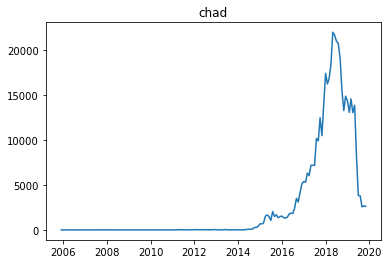

In [52]:
chad_manosphere = sns.lineplot(x = chad_months, y = chad)
plt.title("chad")
plt.savefig('chad_manosphere.png')

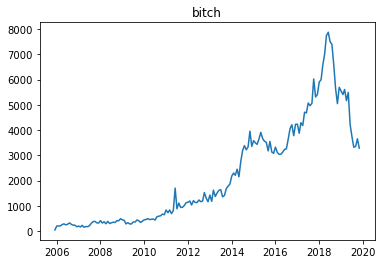

In [53]:
bitch_manosphere = sns.lineplot(x = bitch_months, y = bitch)
plt.title("bitch")
plt.savefig('bitch_manosphere.png')

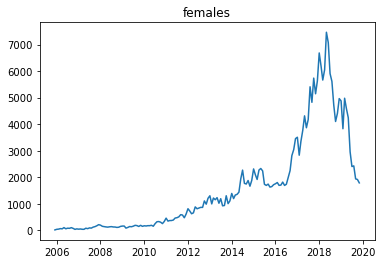

In [54]:
females_manosphere = sns.lineplot(x = females_months, y = females)
plt.title("females")
plt.savefig('females_manosphere.png')

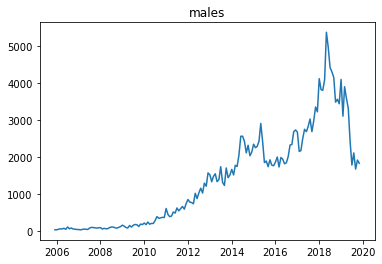

In [55]:
males_manosphere = sns.lineplot(x = males_months, y = males)
plt.title("males")
plt.savefig('males_manosphere.png')

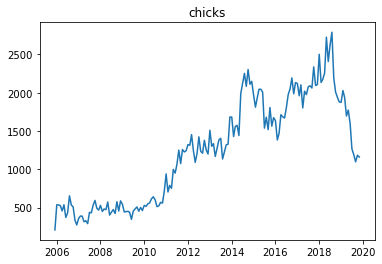

In [56]:
chicks_manosphere = sns.lineplot(x = chicks_months, y = chicks)
plt.title("chicks")
plt.savefig('chicks_manosphere.png')

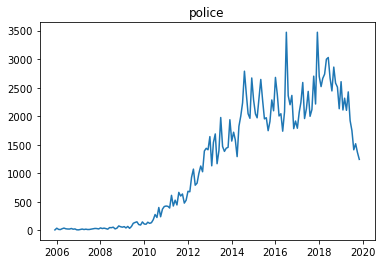

In [57]:
police_manosphere = sns.lineplot(x = police_months, y = police)
plt.title("police")
plt.savefig('police_manosphere.png')

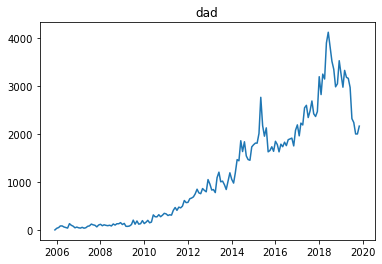

In [58]:
dad_manosphere = sns.lineplot(x = dad_months, y = dad)
plt.title("dad")
plt.savefig('dad_manosphere.png')

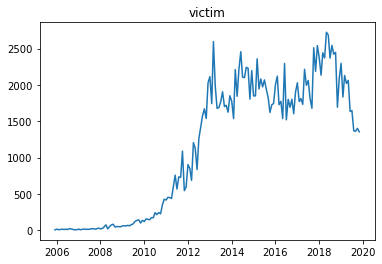

In [59]:
victim_manosphere = sns.lineplot(x = victim_months, y = victim)
plt.title("victim")
plt.savefig('victim_manosphere.png')

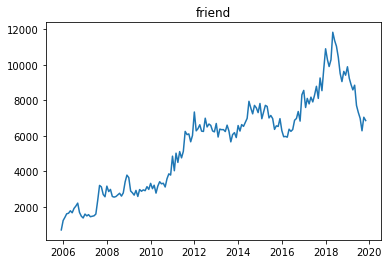

In [60]:
friend_manosphere = sns.lineplot(x = friend_months, y = friend)
plt.title("friend")
plt.savefig('friend_manosphere.png')

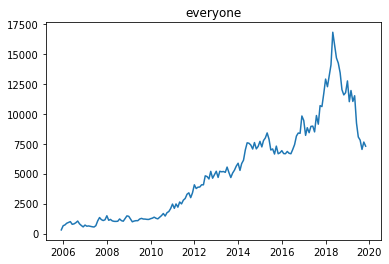

In [61]:
everyone_manosphere = sns.lineplot(x = everyone_months, y = everyone)
plt.title("everyone")
plt.savefig('everyone_manosphere.png')

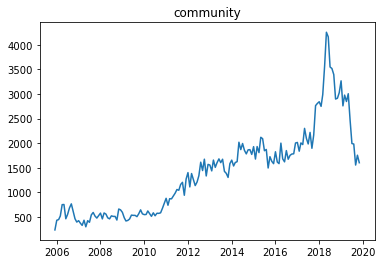

In [62]:
community_manosphere = sns.lineplot(x = community_months, y = community)
plt.title("community")
plt.savefig('community_manosphere.png')

In [63]:
mras_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in mras_months]
orbiter_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in orbiter_months]
simps_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in simps_months]
tyrone_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in tyrone_months]
slayer_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in slayer_months]
stacies_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in stacies_months]
manginas_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in manginas_months]
trannies_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in trannies_months]
soyboy_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in soyboy_months]
becky_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in becky_months]
moids_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in moids_months]
amogs_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in amogs_months]
radfems_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in radfems_months]
wahmen_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in wahmen_months]
vikings_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in vikings_months]
sloots_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in sloots_months]
omegas_months = [dt.datetime.strptime(x,'%Y-%m').date() for x in omegas_months]



# mras_manosphere = sns.lineplot(x = mras_months, y = mras)
# plt.title("mras")
# plt.savefig('mras_manosphere.png')

# orbiter_manosphere = sns.lineplot(x = orbiter_months, y = orbiter)
# plt.title("orbiter")
# plt.savefig('orbiter_manosphere.png')

# simps_manosphere = sns.lineplot(x = simps_months, y = simps)
# plt.title("simps")
# plt.savefig('simps_manosphere.png')

# tyrone_manosphere = sns.lineplot(x = tyrone_months, y = tyrone)
# plt.title("tyrone")
# plt.savefig('tyrone_manosphere.png')

# slayer_manosphere = sns.lineplot(x = slayer_months, y = slayer)
# plt.title("slayer")
# plt.savefig('slayer_manosphere.png')

# stacies_manosphere = sns.lineplot(x = stacies_months, y = stacies)
# plt.title("stacies")
# plt.savefig('stacies_manosphere.png')

# manginas_manosphere = sns.lineplot(x = manginas_months, y = manginas)
# plt.title("manginas")
# plt.savefig('manginas_manosphere.png')

# trannies_manosphere = sns.lineplot(x = trannies_months, y = trannies)
# plt.title("trannies")
# plt.savefig('trannies_manosphere.png')

# soyboy_manosphere = sns.lineplot(x = soyboy_months, y = soyboy)
# plt.title("soyboy")
# plt.savefig('soyboy_manosphere.png')

# becky_manosphere = sns.lineplot(x = becky_months, y = becky)
# plt.title("becky")
# plt.savefig('becky_manosphere.png')

# moids_manosphere = sns.lineplot(x = moids_months, y = moids)
# plt.title("moids")
# plt.savefig('moids_manosphere.png')

# amogs_manosphere = sns.lineplot(x = amogs_months, y = amogs)
# plt.title("amogs")
# plt.savefig('amogs_manosphere.png')

# radfems_manosphere = sns.lineplot(x = radfems_months, y = radfems)
# plt.title("radfems")
# plt.savefig('radfems_manosphere.png')

# wahmen_manosphere = sns.lineplot(x = wahmen_months, y = wahmen)
# plt.title("wahmen")
# plt.savefig('wahmen_manosphere.png')

# vikings_manosphere = sns.lineplot(x = vikings_months, y = vikings)
# plt.title("vikings")
# plt.savefig('vikings_manosphere.png')

# sloots_manosphere = sns.lineplot(x = sloots_months, y = sloots)
# plt.title("sloots")
# plt.savefig('sloots_manosphere.png')

# omegas_manosphere = sns.lineplot(x = omegas_months, y = omegas)
# plt.title("omegas")
# plt.savefig('omegas_manosphere.png')



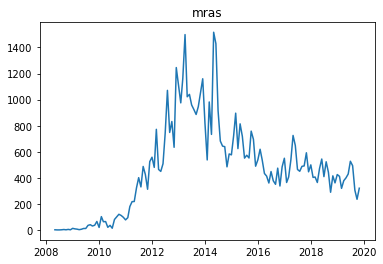

In [64]:
mras_manosphere = sns.lineplot(x = mras_months, y = mras)
plt.title("mras")
plt.savefig('mras_manosphere.png')


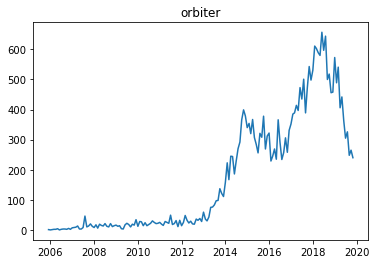

In [65]:

orbiter_manosphere = sns.lineplot(x = orbiter_months, y = orbiter)
plt.title("orbiter")
plt.savefig('orbiter_manosphere.png')


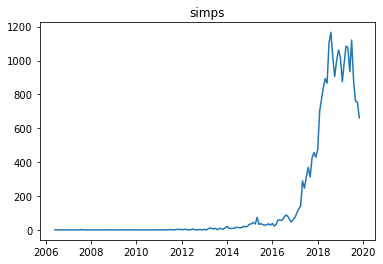

In [66]:

simps_manosphere = sns.lineplot(x = simps_months, y = simps)
plt.title("simps")
plt.savefig('simps_manosphere.png')


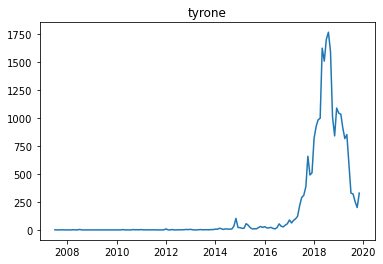

In [67]:

tyrone_manosphere = sns.lineplot(x = tyrone_months, y = tyrone)
plt.title("tyrone")
plt.savefig('tyrone_manosphere.png')


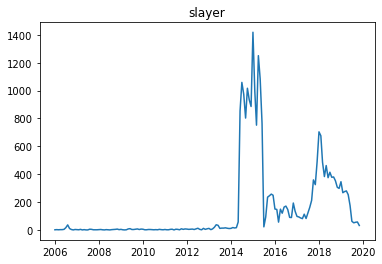

In [68]:

slayer_manosphere = sns.lineplot(x = slayer_months, y = slayer)
plt.title("slayer")
plt.savefig('slayer_manosphere.png')



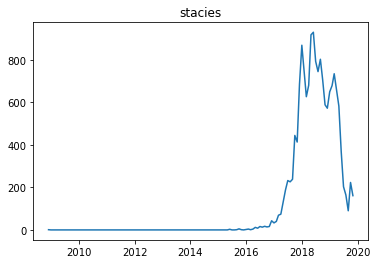

In [69]:
stacies_manosphere = sns.lineplot(x = stacies_months, y = stacies)
plt.title("stacies")
plt.savefig('stacies_manosphere.png')


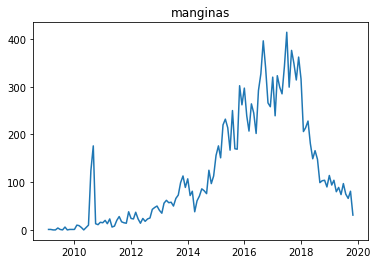

In [70]:

manginas_manosphere = sns.lineplot(x = manginas_months, y = manginas)
plt.title("manginas")
plt.savefig('manginas_manosphere.png')



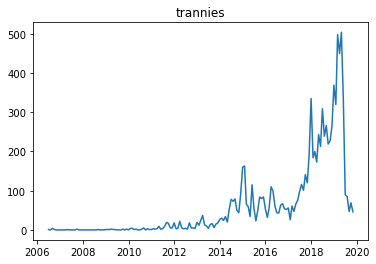

In [71]:
trannies_manosphere = sns.lineplot(x = trannies_months, y = trannies)
plt.title("trannies")
plt.savefig('trannies_manosphere.png')



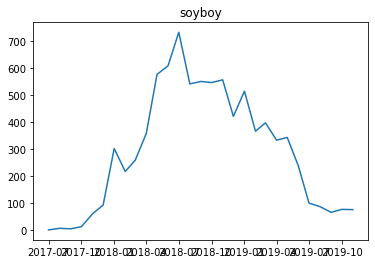

In [72]:
soyboy_manosphere = sns.lineplot(x = soyboy_months, y = soyboy)
plt.title("soyboy")
plt.savefig('soyboy_manosphere.png')


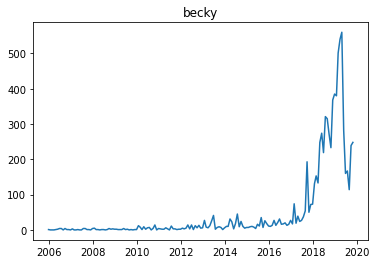

In [73]:

becky_manosphere = sns.lineplot(x = becky_months, y = becky)
plt.title("becky")
plt.savefig('becky_manosphere.png')


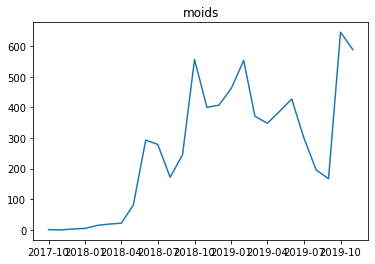

In [74]:

moids_manosphere = sns.lineplot(x = moids_months, y = moids)
plt.title("moids")
plt.savefig('moids_manosphere.png')



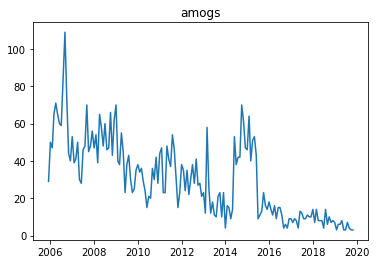

In [75]:
amogs_manosphere = sns.lineplot(x = amogs_months, y = amogs)
plt.title("amogs")
plt.savefig('amogs_manosphere.png')


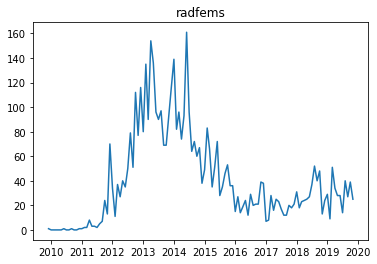

In [76]:
radfems_manosphere = sns.lineplot(x = radfems_months, y = radfems)
plt.title("radfems")
plt.savefig('radfems_manosphere.png')

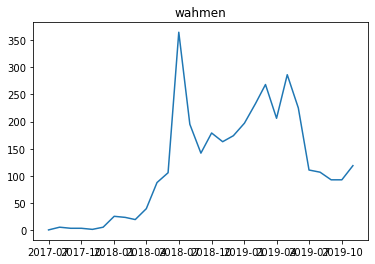

In [77]:
wahmen_manosphere = sns.lineplot(x = wahmen_months, y = wahmen)
plt.title("wahmen")
plt.savefig('wahmen_manosphere.png')

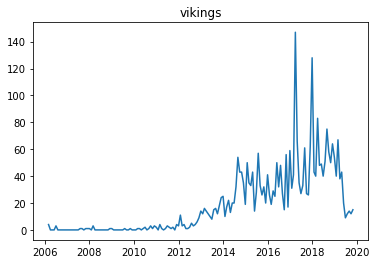

In [78]:
vikings_manosphere = sns.lineplot(x = vikings_months, y = vikings)
plt.title("vikings")
plt.savefig('vikings_manosphere.png')


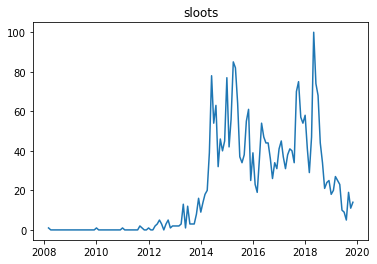

In [79]:

sloots_manosphere = sns.lineplot(x = sloots_months, y = sloots)
plt.title("sloots")
plt.savefig('sloots_manosphere.png')



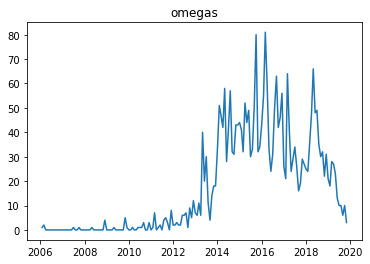

In [80]:
omegas_manosphere = sns.lineplot(x = omegas_months, y = omegas)
plt.title("omegas")
plt.savefig('omegas_manosphere.png')